# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Read in combined EDA file

In [2]:
combined = pd.read_csv('../../data/combined_kev.csv', parse_dates=['date'], index_col=0)

In [3]:
combined.reset_index(inplace = True)

In [4]:
combined.head()

,date,species,wnvpresent,trap,latitude,longitude,species_ord,tmax,tmin,tavg,...,rel_humid_lag5,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,week_number
0,2007-05-29,CULEX PIPIENS,0,T096,41.731922,-87.677512,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,22
1,2007-05-29,CULEX PIPIENS/RESTUANS,0,T086,41.688324,-87.676709,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,22
2,2007-05-29,CULEX PIPIENS/RESTUANS,0,T048,41.867108,-87.654224,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,22
3,2007-05-29,CULEX PIPIENS/RESTUANS,0,T129,41.891126,-87.611560,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,22
4,2007-05-29,CULEX PIPIENS/RESTUANS,0,T050,41.919343,-87.694259,2.0,88,62,75,...,59.221367,40.692805,38.885597,7.51,9.682143,10.2,0.15,0.069286,0.055357,22


In [5]:
combined[['BC', 'HZ', 'DZ',
       'VC', 'SQ', 'TS', 'RA', 'GR', 'MI', 'BR', 'FU', 'FG+', 'FG', 'SN']]

,BC,HZ,DZ,VC,SQ,TS,RA,GR,MI,BR,FU,FG+,FG,SN
0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8471,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8472,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8473,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [6]:
combined.columns

Index(['date', 'species', 'wnvpresent', 'trap', 'latitude', 'longitude',
       'species_ord', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed', 'BC', 'HZ', 'DZ',
       'VC', 'SQ', 'TS', 'RA', 'GR', 'MI', 'BR', 'FU', 'FG+', 'FG', 'SN',
       'rel_humid', 'tavg_change', 'tavg_lag5', 'tavg_lag14', 'tavg_lag28',
       'rel_humid_lag5', 'rel_humid_lag14', 'rel_humid_lag28', 'avgspeed_lag5',
       'avgspeed_lag14', 'avgspeed_lag28', 'preciptotal_lag5',
       'preciptotal_lag14', 'preciptotal_lag28', 'week_number'],
      dtype='object')

In [7]:
# Check dataframe shape
combined.shape

(8475, 52)

In [8]:
combined.dtypes

date                 datetime64[ns]
species                      object
wnvpresent                    int64
trap                         object
latitude                    float64
longitude                   float64
species_ord                 float64
tmax                          int64
tmin                          int64
tavg                          int64
depart                        int64
dewpoint                      int64
wetbulb                       int64
heat                          int64
cool                          int64
sunrise                       int64
sunset                        int64
preciptotal                 float64
stnpressure                 float64
sealevel                    float64
resultspeed                 float64
resultdir                     int64
avgspeed                    float64
BC                            int64
HZ                            int64
DZ                            int64
VC                            int64
SQ                          

Convert sunrise & sunset to datetime to seconds for each entry

In [9]:
def get_sec(time_str):
    hours = time_str//100 # Get the hour value
    mins = time_str % 100 # Get the minute value
    total_seconds = hours * 3600 + mins * 60
    return total_seconds

In [10]:
combined['sunrise'] = combined['sunrise'].apply(get_sec)
combined['sunset'] = combined['sunset'].apply(get_sec)

combined['total_sunlight_time'] = combined['sunset'] - combined['sunrise']

In [11]:
combined

,date,species,wnvpresent,trap,latitude,longitude,species_ord,tmax,tmin,tavg,...,rel_humid_lag14,rel_humid_lag28,avgspeed_lag5,avgspeed_lag14,avgspeed_lag28,preciptotal_lag5,preciptotal_lag14,preciptotal_lag28,week_number,total_sunlight_time
0,2007-05-29,CULEX PIPIENS,0,T096,41.731922,-87.677512,2.0,88,62,75,...,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22,53760
1,2007-05-29,CULEX PIPIENS/RESTUANS,0,T086,41.688324,-87.676709,2.0,88,62,75,...,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22,53760
2,2007-05-29,CULEX PIPIENS/RESTUANS,0,T048,41.867108,-87.654224,2.0,88,62,75,...,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22,53760
3,2007-05-29,CULEX PIPIENS/RESTUANS,0,T129,41.891126,-87.611560,2.0,88,62,75,...,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22,53760
4,2007-05-29,CULEX PIPIENS/RESTUANS,0,T050,41.919343,-87.694259,2.0,88,62,75,...,40.692805,38.885597,7.51,9.682143,10.200000,1.500000e-01,0.069286,0.055357,22,53760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,2013-09-26,CULEX RESTUANS,0,T102,41.750498,-87.605294,1.0,75,52,64,...,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39,43140
8471,2013-09-26,CULEX RESTUANS,0,T082,41.803423,-87.642984,1.0,75,52,64,...,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39,43140
8472,2013-09-26,CULEX RESTUANS,0,T048,41.867108,-87.654224,1.0,75,52,64,...,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39,43140
8473,2013-09-26,CULEX RESTUANS,0,T220,41.963976,-87.691810,1.0,75,52,64,...,60.788648,65.361296,6.48,8.296429,8.271429,7.917278e-16,0.100714,0.088214,39,43140


Plot out a heatmap of the columns to identify potential correlations and the degree of correlation between attributes which could be useful for modelling, especially for the purpose of feature selection. From the plots, it seems like weather related columns have mild correlation to the presenct of West Nile Virus. Furthermore, strong correlation is shown for temperature, dewpoint, wetbulb, heating and cooling days. Some of the columns do not have correlation values as all entries are the same, hence resulting in NaN values.

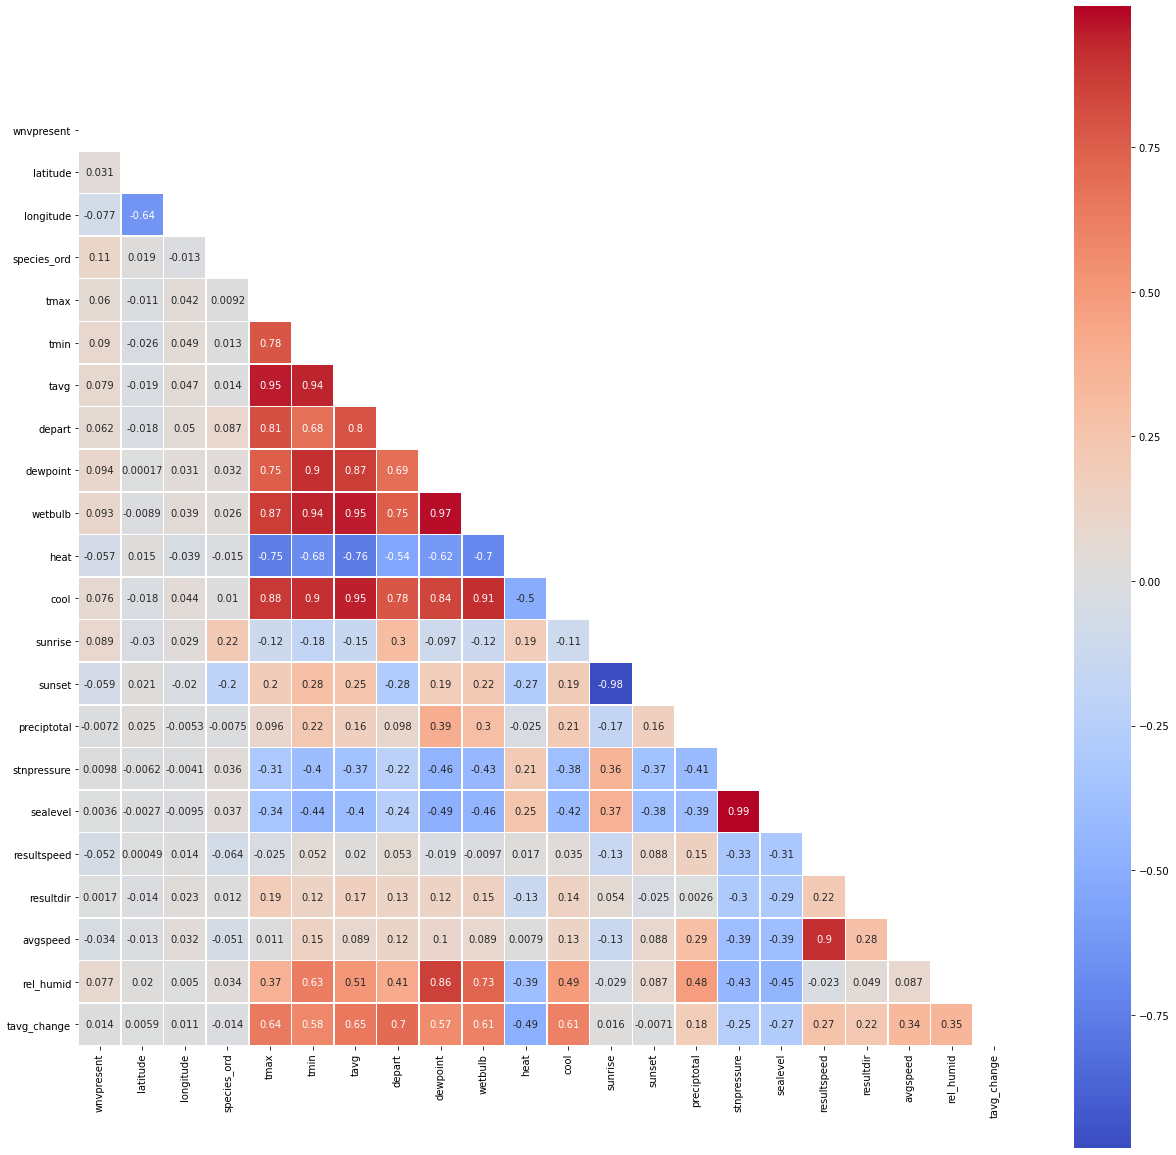

In [12]:
# Do a heatmap for the columns except those columns representing lag values
columns = ['date', 'species', 'wnvpresent', 'trap', 'latitude', 'longitude',
       'species_ord', 'tmax', 'tmin', 'tavg', 'depart', 'dewpoint', 'wetbulb',
       'heat', 'cool', 'sunrise', 'sunset', 'preciptotal', 'stnpressure',
       'sealevel', 'resultspeed', 'resultdir', 'avgspeed','rel_humid', 'tavg_change']

subset_combined = combined[columns]
fig, ax = plt.subplots(figsize = (21,21))
mask = np.zeros_like(subset_combined.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(subset_combined.corr(), mask = mask, square = True, linewidths = 0.5,cmap= "coolwarm", ax = ax, annot = True);

# Read in test data, process and merge with weather data

In [32]:
# Read in test file and combine with weather data
test = pd.read_csv("../../data/test.csv", parse_dates = ["Date"])
weather = pd.read_csv("../../data/weather_eng.csv", parse_dates = ["date"], index_col = 0)

#Lowercase the column name
test.columns = [col.lower() for col in test.columns]
test.head()

,id,date,address,species,block,street,trap,addressnumberandstreet,latitude,longitude,addressaccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [33]:
# Check size of test
test.shape

(116293, 11)

In [34]:
# Check if id is nunique
test["id"].nunique()

116293

In [35]:
test['species_ord'] = test['species'].map({'CULEX PIPIENS/RESTUANS': 2, 'CULEX PIPIENS': 2, 'CULEX RESTUANS': 1})

#0 for species other than the virus carriers
test['species_ord'].fillna(0, inplace=True)

In [36]:
test["week"] = test["date"].dt.isocalendar().week

**Drop columns such as `id`, `address`, `block`, `street`, `addressnumberandstreet` and `addressaccuracy` since we have lat lon columns.**

In [37]:
test.drop(["id", "address","block", "street", "trap", "addressnumberandstreet", "addressaccuracy"], axis = 1, inplace = True)

In [38]:
# Merge test set and weather data
test_weather = pd.merge(test, weather, on = "date")

In [39]:
test_weather['sunrise'] = test_weather['sunrise'].apply(get_sec)
test_weather['sunset'] = test_weather['sunset'].apply(get_sec)

test_weather['total_sunlight_time'] = test_weather['sunset'] - test_weather['sunrise']

# Modelling

Train-test-split
- Most important feature to presence of wnv mosquitos
- Lag by incubation period of mosquito
- Log reg that one feature
- Discuss predictive value vs interpretability of model (K)

Main goal for this proj is to have a good model as most of the features are not within our control anw, in particularly weather conditions

The measures to combat wnv are not really inferred from model
Polynomial - degree 2 and scale

Get separate feature lists & compare later on after modelling with each.


## Import modelling library

In [40]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import sklearn.metrics as metrics

#XGboost library
from xgboost import XGBClassifier

In [41]:
len(test_weather.columns)

51

In [42]:
# Drop features before applying polynomial features with degree 2
X = combined.drop(columns=['date', 'species', 'trap', 'wnvpresent'])
X_features = X.columns
y = combined['wnvpresent']


test_weather.drop(columns=['date', 'species'], inplace = True)


In [43]:
X.columns

Index(['latitude', 'longitude', 'species_ord', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'BC', 'HZ', 'DZ', 'VC', 'SQ', 'TS', 'RA', 'GR', 'MI', 'BR',
       'FU', 'FG+', 'FG', 'SN', 'rel_humid', 'tavg_change', 'tavg_lag5',
       'tavg_lag14', 'tavg_lag28', 'rel_humid_lag5', 'rel_humid_lag14',
       'rel_humid_lag28', 'avgspeed_lag5', 'avgspeed_lag14', 'avgspeed_lag28',
       'preciptotal_lag5', 'preciptotal_lag14', 'preciptotal_lag28',
       'week_number', 'total_sunlight_time'],
      dtype='object')

In [44]:
test_weather.columns

Index(['latitude', 'longitude', 'species_ord', 'week', 'tmax', 'tmin', 'tavg',
       'depart', 'dewpoint', 'wetbulb', 'heat', 'cool', 'sunrise', 'sunset',
       'preciptotal', 'stnpressure', 'sealevel', 'resultspeed', 'resultdir',
       'avgspeed', 'FG', 'BC', 'SN', 'HZ', 'TS', 'DZ', 'GR', 'RA', 'FG+', 'SQ',
       'BR', 'FU', 'MI', 'VC', 'rel_humid', 'tavg_change', 'tavg_lag5',
       'tavg_lag14', 'tavg_lag28', 'rel_humid_lag5', 'rel_humid_lag14',
       'rel_humid_lag28', 'avgspeed_lag5', 'avgspeed_lag14', 'avgspeed_lag28',
       'preciptotal_lag5', 'preciptotal_lag14', 'preciptotal_lag28',
       'total_sunlight_time'],
      dtype='object')

In [45]:
# Check column of X and test_weather
len(X.columns), len(test_weather.columns)

(49, 49)

## Feature transformation using Polynomial Features

In [22]:
# Instantiate PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False) # Removes the inclusion of 1(constant term)

# Create X_poly
X_poly = poly.fit_transform(X)

# View X_poly in a DataFrame
pd.DataFrame(X_poly, columns = poly.get_feature_names(X_features))

,latitude,longitude,species_ord,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,...,preciptotal_lag14^2,preciptotal_lag14 preciptotal_lag28,preciptotal_lag14 week_number,preciptotal_lag14 total_sunlight_time,preciptotal_lag28^2,preciptotal_lag28 week_number,preciptotal_lag28 total_sunlight_time,week_number^2,week_number total_sunlight_time,total_sunlight_time^2
0,41.731922,-87.677512,2.0,88.0,62.0,75.0,11.0,58.0,65.0,0.0,...,0.004801,0.003835,1.524286,3724.800000,0.003064,1.217857,2976.000000,484.0,1182720.0,2.890138e+09
1,41.688324,-87.676709,2.0,88.0,62.0,75.0,11.0,58.0,65.0,0.0,...,0.004801,0.003835,1.524286,3724.800000,0.003064,1.217857,2976.000000,484.0,1182720.0,2.890138e+09
2,41.867108,-87.654224,2.0,88.0,62.0,75.0,11.0,58.0,65.0,0.0,...,0.004801,0.003835,1.524286,3724.800000,0.003064,1.217857,2976.000000,484.0,1182720.0,2.890138e+09
3,41.891126,-87.611560,2.0,88.0,62.0,75.0,11.0,58.0,65.0,0.0,...,0.004801,0.003835,1.524286,3724.800000,0.003064,1.217857,2976.000000,484.0,1182720.0,2.890138e+09
4,41.919343,-87.694259,2.0,88.0,62.0,75.0,11.0,58.0,65.0,0.0,...,0.004801,0.003835,1.524286,3724.800000,0.003064,1.217857,2976.000000,484.0,1182720.0,2.890138e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,41.750498,-87.605294,1.0,75.0,52.0,64.0,4.0,52.0,58.0,1.0,...,0.010143,0.008884,3.927857,4344.814286,0.007782,3.440357,3805.564286,1521.0,1682460.0,1.861060e+09
8471,41.803423,-87.642984,1.0,75.0,52.0,64.0,4.0,52.0,58.0,1.0,...,0.010143,0.008884,3.927857,4344.814286,0.007782,3.440357,3805.564286,1521.0,1682460.0,1.861060e+09
8472,41.867108,-87.654224,1.0,75.0,52.0,64.0,4.0,52.0,58.0,1.0,...,0.010143,0.008884,3.927857,4344.814286,0.007782,3.440357,3805.564286,1521.0,1682460.0,1.861060e+09
8473,41.963976,-87.691810,1.0,75.0,52.0,64.0,4.0,52.0,58.0,1.0,...,0.010143,0.008884,3.927857,4344.814286,0.007782,3.440357,3805.564286,1521.0,1682460.0,1.861060e+09


In [23]:
## Train-test split
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly,
                                                              y,
                                                              test_size = 0.3,
                                                              stratify = y)

In [67]:
## Standard Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_poly_train) #Apply the scaling 
X_test_scaled = ss.transform(X_poly_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

## Applying PCA for feature extraction, together with various predictor models.

1) PCA to do feature extraction followed by the following:
- XG boost
- Random forest
- Extra trees

**Two assumptions that PCA makes:**

 -- A. **Linearity:** PCA detects and controls for linear relationships, so we assume that the data does not hold nonlinear relationships (or that we don't care about these nonlinear relationships).
    - We are using our covariance matrix to determine important "directions," which is a measure of the linear relationship between observations!
    
 -- B. **Large variances define importance:** If data is spread in a direction, that direction is important! If there is little spread in a direction, that direction is not very important.

2) GridsearchCV etc to get best results. Compare best model for each feature set, choose best of best

3) Refit best model to entire dataset and predict test set & submit


### GridSearchCV with PCA and XGBoost

In [25]:
pipe_pca_xgboost = Pipeline(steps = [('pca', PCA()),
                         ('xgboost', XGBClassifier())]
               )

#Default booster: gbtree
pipeline_param = { 
    'pca__n_components': [20, 30, 40],
    'xgboost__max_depth': [3, 4, 5, 6], #Depth of tree (higher value implies liekly overfit)
    'xgboost__gamma' : [ 0.0, 0.2 , 0.4], #Min loss reduction required for further partition
    'xgboost__learning_rate' : [0.15, 0.25, 0.35], #step size feature weight shrinkage
    'xgboost__use_label_encoder' : [False],
    'xgboost__eval_metric': ["auc"],
    "xgboost__objective" : ["binary:logistic"]
}

gs_pca_xg = GridSearchCV(
    pipe_pca_xgboost,
    param_grid = pipeline_param,
    cv = 5,
    verbose = 1)

gs_pca_xg.fit(X_train_scaled, y_train)

print("Best parameter (CV score=%0.3f):" % gs_pca_xg.best_score_)
print(gs_pca_xg.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameter (CV score=0.946):
{'pca__n_components': 20, 'xgboost__eval_metric': 'auc', 'xgboost__gamma': 0.4, 'xgboost__learning_rate': 0.15, 'xgboost__max_depth': 3, 'xgboost__objective': 'binary:logistic', 'xgboost__use_label_encoder': False}


In [26]:
best_param = gs_pca_xg.best_params_
pca_best = best_param["pca__n_components"]
xgboost_gamma = best_param["xgboost__gamma"]
xgboost_learnrate = best_param["xgboost__learning_rate"]
xgboost_max_depth = best_param["xgboost__max_depth"]


# save model to file
pickle.dump(gs_pca_xg, open(f"xg_ZQ_pca{pca_best}_gamma{xgboost_gamma}_lr{xgboost_learnrate}_depth{xgboost_max_depth}.pkl", "wb"))

In [27]:
# Evaluate the best model on the test data.
print(gs_pca_xg.score(X_test_scaled, y_test))

0.9473063311049941


In [28]:
ypreds = gs_pca_xg.predict(X_test_scaled)
ypreds

array([0, 0, 0, ..., 0, 0, 0])

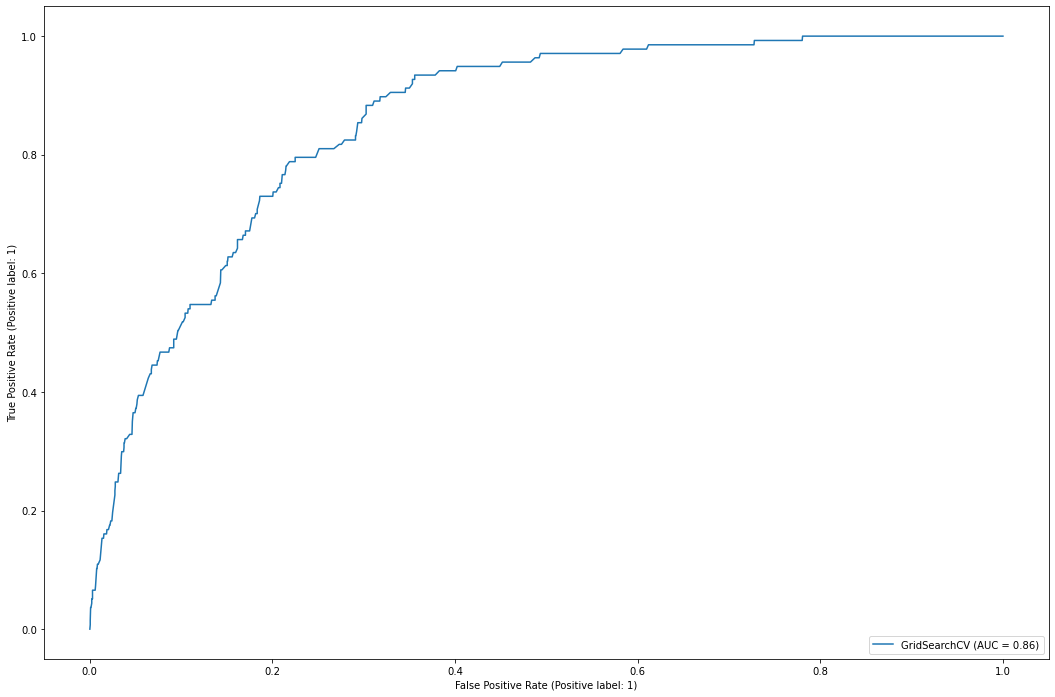

In [30]:
# calculate roc curve
fig, ax = plt.subplots(figsize = (18,12))
metrics.plot_roc_curve(gs_pca_xg, X_test_scaled, y_test, ax = ax);

In [85]:
# Scoring metrics
scores_xg = {'Classifier': "XGBoost on PCA", 
             'Cutoff': "Nil", 
             'PCA_components': gs_pca_xg.best_params_["pca__n_components"]}
y_preds = gs_pca_xg.predict(X_test_scaled)
y_pred_probas = gs_pca_xg.predict_proba(X_test_scaled)[:, 1]
y_train_pred_probas = gs_pca_xg.predict_proba(X_train_scaled)[:, 1]
scores_xg['Train ROC-AUC Score'] = metrics.roc_auc_score(y_train, y_train_pred_probas)
scores_xg['Test ROC-AUC Score'] = metrics.roc_auc_score(y_test, y_pred_probas)
scores_xg['F1'] = metrics.f1_score(y_test, y_preds)
scores_xg['Precision'] = metrics.precision_score(y_test, y_preds)
scores_xg['Recall'] = metrics.recall_score(y_test, y_preds)
scores_xg['Accuracy'] = metrics.accuracy_score(y_test, y_preds)

In [40]:
scores_xg

{'Classifier': 'ExtraTrees on PCA',
 'Cutoff': 'Nil',
 'PCA_components': 20,
 'Train ROC-AUC Score': 0.9224460419636493,
 'Test ROC-AUC Score': 0.8568511810498085,
 'F1': 0.06944444444444445,
 'Precision': 0.7142857142857143,
 'Recall': 0.0364963503649635,
 'Accuracy': 0.9473063311049941}

### GridSearchCV with PCA and RandomForest

In [33]:
pipe_pca_rf = Pipeline(steps = [('pca', PCA()),
                         ('rfc', RandomForestClassifier())]
               )

pipeline_param_rf = {
    'pca__n_components': [15, 30, 40],
    'rfc__max_depth': [3, 4, 5],
    'rfc__random_state': [42],
    'rfc__n_estimators': [100, 150 ,200]
}

gs_pca_rfc = GridSearchCV(
    pipe_pca_rf,
    param_grid = pipeline_param_rf,
    cv = 5,
    verbose = 1)

gs_pca_rfc.fit(X_train_scaled, y_train)

print("Best parameter (CV score=%0.3f):" % gs_pca_rfc.best_score_)
print(gs_pca_rfc.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameter (CV score=0.946):
{'pca__n_components': 15, 'rfc__max_depth': 3, 'rfc__n_estimators': 100, 'rfc__random_state': 42}


In [34]:
best_param_rfc = gs_pca_rfc.best_params_
pca_best = best_param_rfc["pca__n_components"]
rfc_n_estimators = best_param_rfc["rfc__n_estimators"]
rfc_max_depth = best_param_rfc["rfc__max_depth"]

# save model to file
pickle.dump(gs_pca_rfc, open(f"rfc_ZQ_pca{pca_best}_rfc_n{rfc_n_estimators}_depth{rfc_max_depth}.pkl", "wb"))

In [35]:
# Evaluate the best model on the test data.
print(gs_pca_rfc.score(X_test_scaled, y_test))

0.9461266220998821


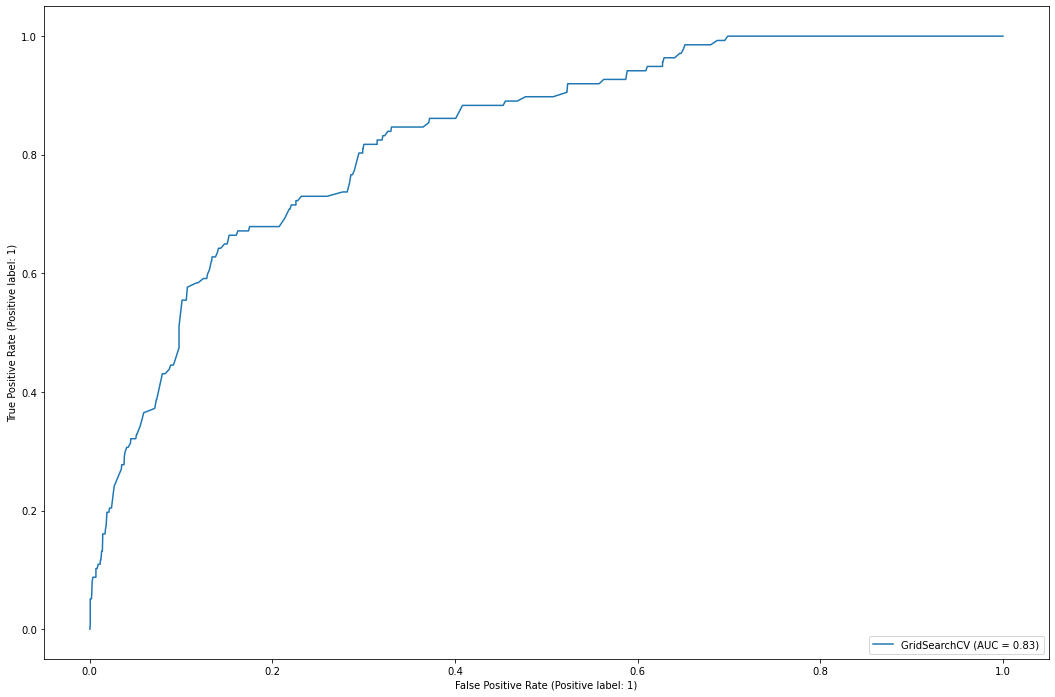

In [36]:
# calculate roc curve
fig, ax = plt.subplots(figsize = (18,12))
metrics.plot_roc_curve(gs_pca_rfc, X_test_scaled, y_test, ax = ax);

In [86]:
# Scoring metrics
scores_rfc = {'Classifier': "RandomForest on PCA",
              'Cutoff': "Nil",
              "PCA_components": gs_pca_rfc.best_params_["pca__n_components"]}
y_preds = gs_pca_rfc.predict(X_test_scaled)
y_pred_probas = gs_pca_rfc.predict_proba(X_test_scaled)[:, 1]
y_train_pred_probas = gs_pca_rfc.predict_proba(X_train_scaled)[:, 1]
scores_rfc['Train ROC-AUC Score'] = metrics.roc_auc_score(y_train, y_train_pred_probas)
scores_rfc['Test ROC-AUC Score'] = metrics.roc_auc_score(y_test, y_pred_probas)
scores_rfc['F1'] = metrics.f1_score(y_test, y_preds)
scores_rfc['Precision'] = metrics.precision_score(y_test, y_preds)
scores_rfc['Recall'] = metrics.recall_score(y_test, y_preds)
scores_rfc['Accuracy'] = metrics.accuracy_score(y_test, y_preds)

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
scores_rfc

{'Classifier': 'ExtraTrees on PCA',
 'Cutoff': 'Nil',
 'PCA_components': 15,
 'Train ROC-AUC Score': 0.847156762295082,
 'Test ROC-AUC Score': 0.8298884783175879,
 'F1': 0.0,
 'Precision': 0.0,
 'Recall': 0.0,
 'Accuracy': 0.9461266220998821}

In [57]:
# Get the names of each feature
rfc_estimator = gs_pca_rfc.best_estimator_.named_steps["rfc"]

Since PCA is used for feature extraction and reduction, it would not make much sense to plot out the feature importances as it is not interpretable directly.

### GridSearchCV with PCA and ExtraTrees

In [75]:
pipe_pca_et = Pipeline(steps = [('pca', PCA()),
                         ('extratrees', ExtraTreesClassifier())]
               )

pipeline_param_et = {
    'pca__n_components': [15, 20, 30, 40],
    'extratrees__max_depth': [3, 4, 5],
    'extratrees__random_state': [42],
    'extratrees__n_estimators': [100, 150 ,200],
}

gs_pca_etc = GridSearchCV(
    pipe_pca_et,
    param_grid = pipeline_param_et,
    cv = 5,
    verbose = 1)

gs_pca_etc.fit(X_train_scaled, y_train)


print("Best parameter (CV score=%0.3f):" % gs_pca_etc.best_score_)
print(gs_pca_etc.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameter (CV score=0.946):
{'extratrees__max_depth': 3, 'extratrees__n_estimators': 100, 'extratrees__random_state': 42, 'pca__n_components': 15}


In [76]:
best_param_etc = gs_pca_etc.best_params_
pca_best = best_param_etc["pca__n_components"]
etc_n_estimators = best_param_etc["extratrees__n_estimators"]
etc_max_depth = best_param_etc["extratrees__max_depth"]

# save model to file
pickle.dump(gs_pca_etc, open(f"etc_ZQ_pca{pca_best}_etc_n{etc_n_estimators}_depth{rfc_max_depth}.pkl", "wb"))

In [77]:
# Evaluate the best model on the test data.
print(gs_pca_etc.score(X_test_scaled, y_test))

0.9461266220998821


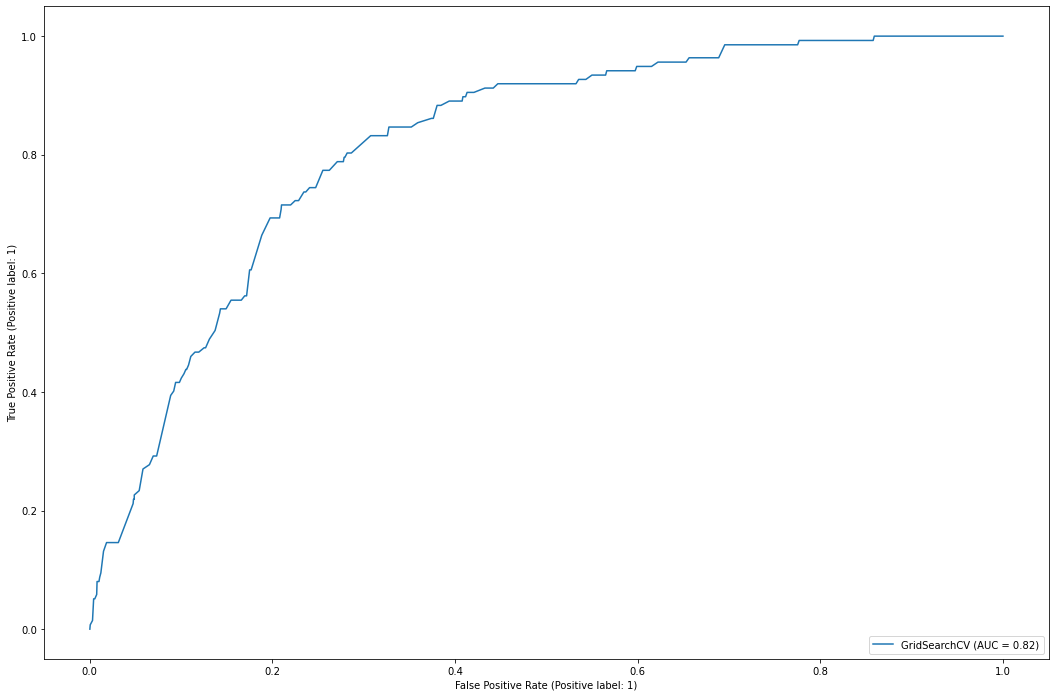

In [79]:
# calculate roc curve
fig, ax = plt.subplots(figsize = (18,12))
metrics.plot_roc_curve(gs_pca_etc, X_test_scaled, y_test, ax = ax);

In [80]:
# Summary of model

# Scoring metrics
scores_etc = {'Classifier': "ExtraTrees on PCA", 
              'Cutoff': "Nil",
              'PCA_components': gs_pca_etc.best_params_["pca__n_components"]}
y_preds = gs_pca_etc.predict(X_test_scaled)
y_pred_probas = gs_pca_etc.predict_proba(X_test_scaled)[:, 1]
y_train_pred_probas = gs_pca_etc.predict_proba(X_train_scaled)[:, 1]
scores_etc['Train ROC-AUC Score'] = metrics.roc_auc_score(y_train, y_train_pred_probas)
scores_etc['Test ROC-AUC Score'] = metrics.roc_auc_score(y_test, y_pred_probas)
scores_etc['F1'] = metrics.f1_score(y_test, y_preds)
scores_etc['Precision'] = metrics.precision_score(y_test, y_preds)
scores_etc['Recall'] = metrics.recall_score(y_test, y_preds)
scores_etc['Accuracy'] = metrics.accuracy_score(y_test, y_preds)

/home/qzq/anaconda3/envs/dsi/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
scores_etc

{'Classifier': 'ExtraTrees on PCA',
 'Cutoff': 'Nil',
 'PCA_components': 15,
 'Train ROC-AUC Score': 0.8090698503207413,
 'Test ROC-AUC Score': 0.8171799819186827,
 'F1': 0.0,
 'Precision': 0.0,
 'Recall': 0.0,
 'Accuracy': 0.9461266220998821}

In [87]:
# Combine all dictionary metrics to single dataframe
model_scores = pd.DataFrame([scores_xg, scores_rfc, scores_etc])
model_scores

,Classifier,Cutoff,PCA_components,Train ROC-AUC Score,Test ROC-AUC Score,F1,Precision,Recall,Accuracy
0,XGBoost on PCA,Nil,20,0.922446,0.856851,0.069444,0.714286,0.036496,0.947306
1,RandomForest on PCA,Nil,15,0.847157,0.829888,0.000000,0.000000,0.000000,0.946127
2,ExtraTrees on PCA,Nil,15,0.809070,0.817180,0.000000,0.000000,0.000000,0.946127
